# Gold Prediction 🪙

Ayu Siti Nasya Ningrum - MIP-ML-13
Machine Learning intern @Mentorness

## Data Import & Preparation

In [356]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [340]:
df = pd.read_csv("goldstock.csv")
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [341]:
df = df.drop('Unnamed: 0', axis=1)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


1. Date: A unique identifier for each trading day
2. Close: Closing price of gold on the respective date
3. Volume: Gold trading volume on the corresponding date
4. Open: Opening price of gold on the respective date
5. High: The highest recorded price of gold during the trading day
6. Low: The lowest price recorded for gold in the trading day.

## Data Preprocessing

In [342]:
df_check = []
for i in df.columns :
  unique_data = df[i].nunique()
  missing_value = df[i].isnull().sum()
  duplicated_data = df.duplicated().sum()

  df_check.append([i, unique_data, missing_value, duplicated_data])

df_info = pd.DataFrame(df_check)
df_info.columns = ['data', 'unique_data', 'missing_value', 'duplicated_data']
df_info

,data,unique_data,missing_value,duplicated_data
0,Date,2493,0,18
1,Close,2059,0,18
2,Volume,2466,0,18
3,Open,2017,0,18
4,High,2073,0,18
5,Low,2049,0,18


In [343]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2493 non-null   object 
 1   Close   2493 non-null   float64
 2   Volume  2493 non-null   float64
 3   Open    2493 non-null   float64
 4   High    2493 non-null   float64
 5   Low     2493 non-null   float64
dtypes: float64(5), object(1)
memory usage: 136.3+ KB


In [344]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2493 non-null   datetime64[ns]
 1   Close   2493 non-null   float64       
 2   Volume  2493 non-null   float64       
 3   Open    2493 non-null   float64       
 4   High    2493 non-null   float64       
 5   Low     2493 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 136.3 KB


## Exploratory Data Analysis

### Visualization of Distribution

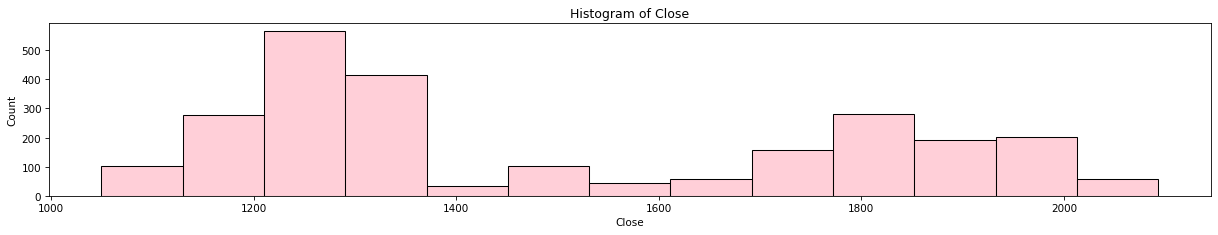

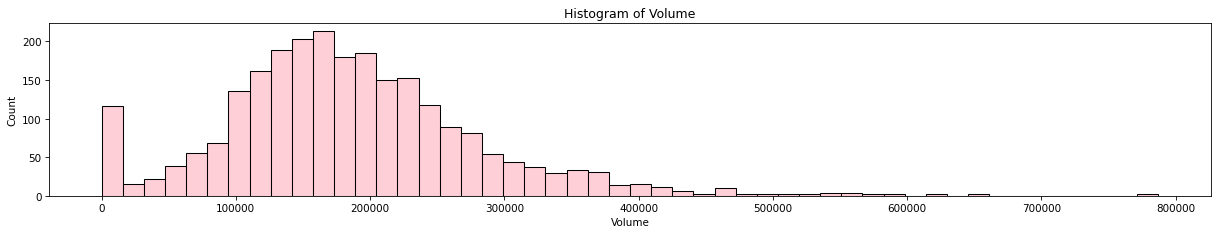

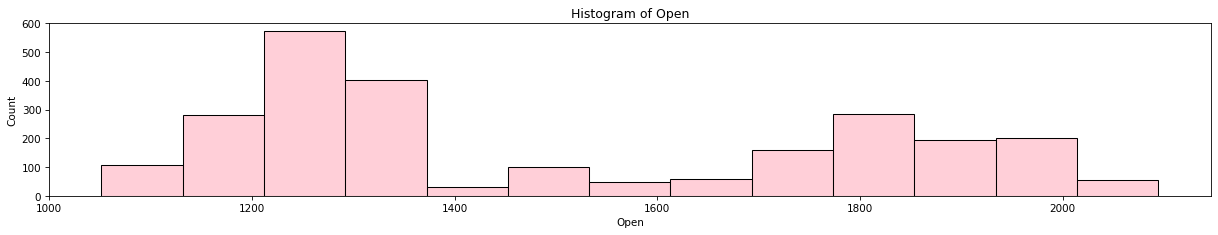

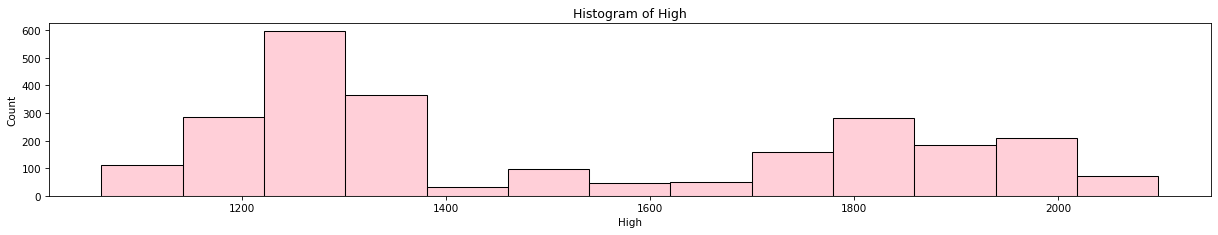

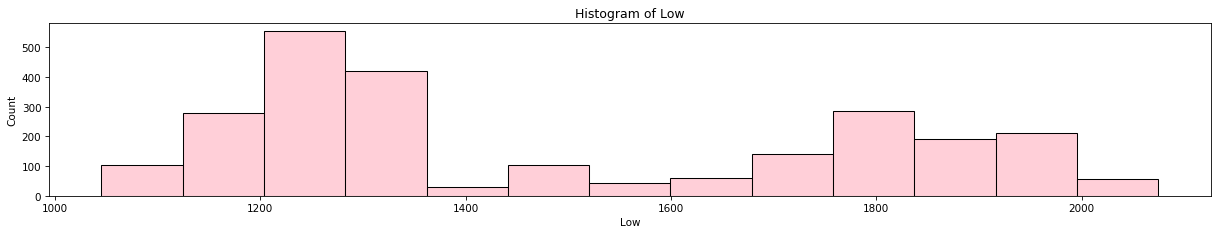

In [249]:
numeric_col = ['Close', 'Volume', 'Open', 'High', 'Low']

# Plot histograms for the chosen columns
for col in numeric_col:
  plt.figure(figsize=(20, 3))
  sns.histplot(df[col], color='pink')
  plt.title(f'Histogram of {col}')
  plt.show()

### Analysis of Gold Prices Over Time

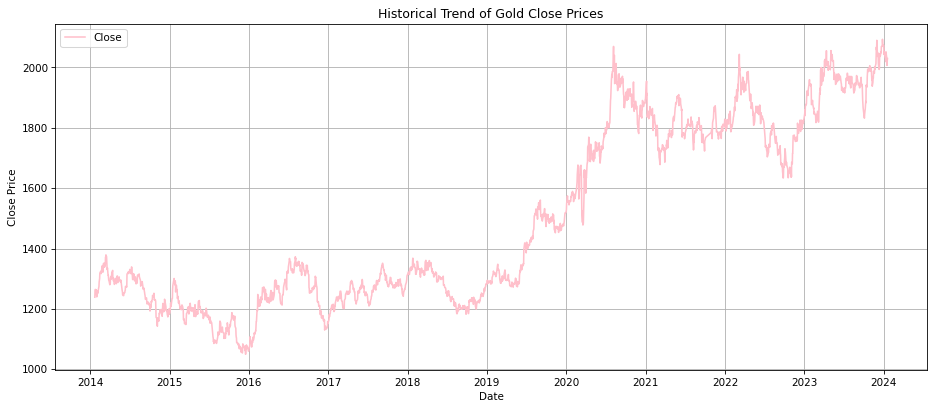

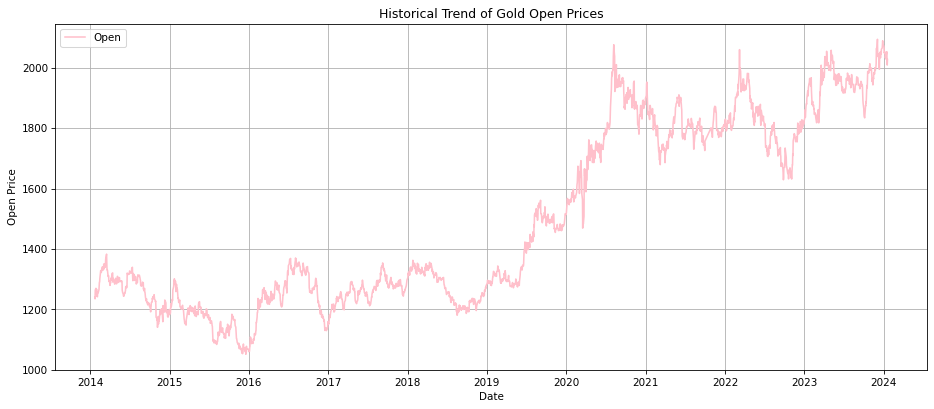

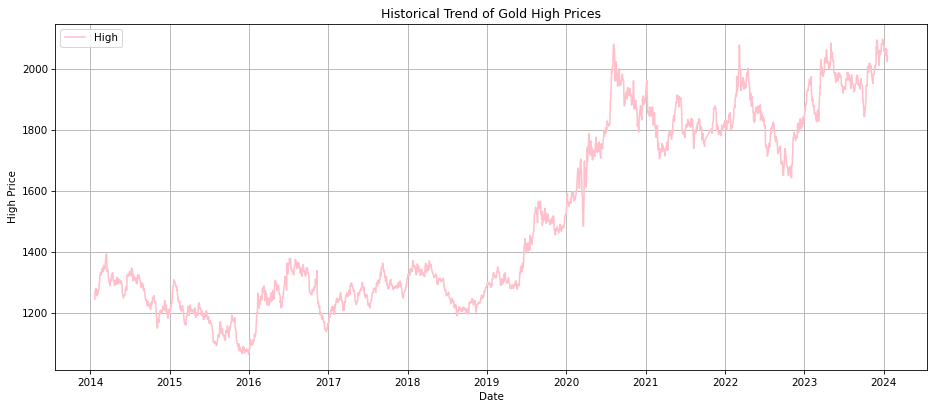

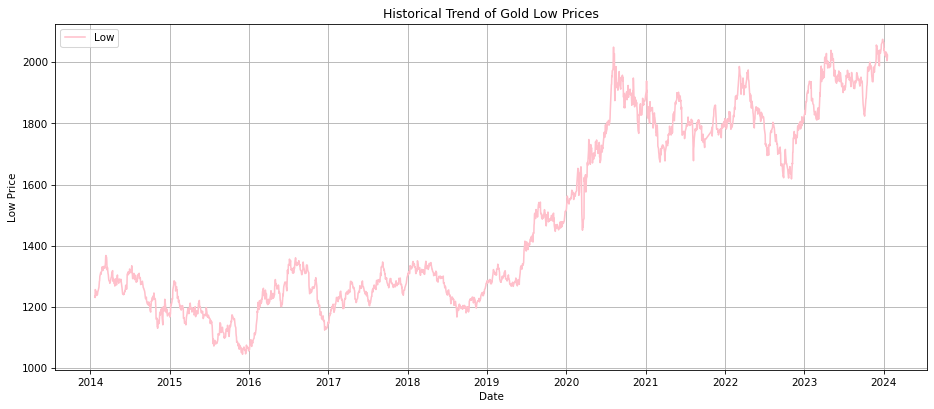

In [250]:
plot_prices = ['Close', 'Open', 'High', 'Low']

for prices in plot_prices :
    plt.figure(figsize=(15, 6))
    plt.plot(df['Date'], df[prices], label=prices, color='pink')
    plt.title('Historical Trend of Gold %s Prices' %prices)
    plt.xlabel('Date')
    plt.ylabel('%s Price' %prices)
    plt.legend()
    plt.grid(True)
    plt.show()

📍From the historical trend of gold prices depicted above, it's evident that the price of gold generally rises each year. A significant surge began between 2019 and 2020, with the peak increase happening in mid-2020. Yet, the lowest gold price was observed between 2015 and 2016.

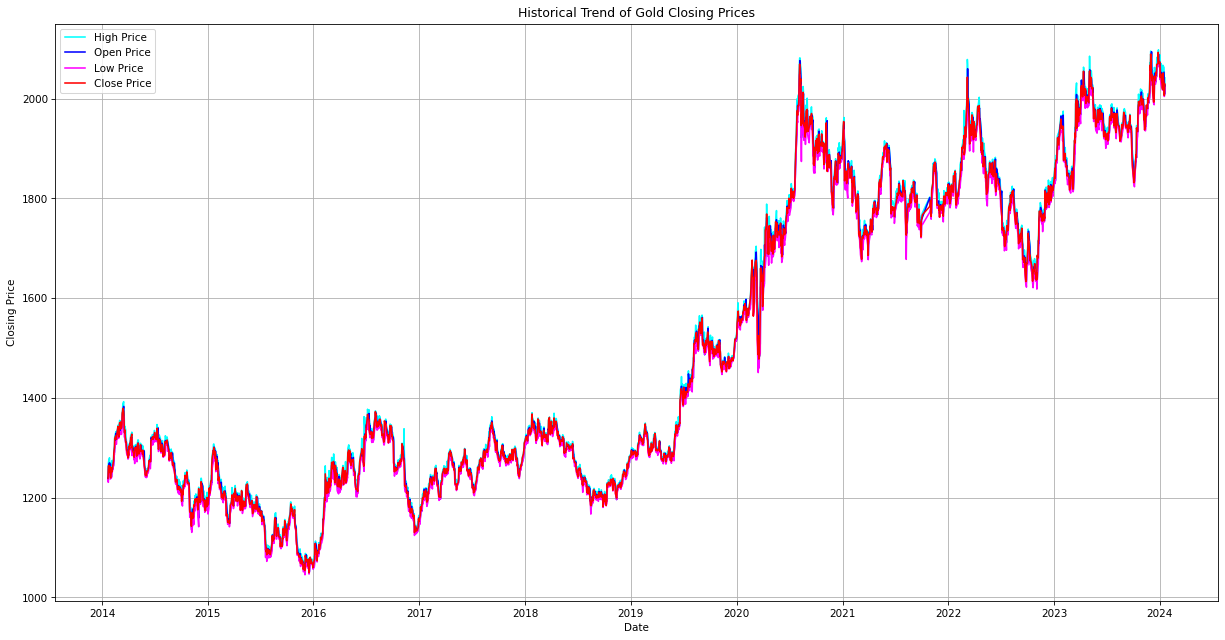

In [251]:
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['High'], label='High Price', color='cyan')
plt.plot(df['Date'], df['Open'], label='Open Price', color='blue')
plt.plot(df['Date'], df['Low'], label='Low Price', color='magenta')
plt.plot(df['Date'], df['Close'], label='Close Price', color='red')
plt.title('Historical Trend of Gold Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

📍 The graph above displays each OHLC value, demonstrating that the differences between the Open, High, Low, and Close prices are minimal compared to the original price.

In [252]:
fig = go.Figure(data=[go.Ohlc(x=df['Date'],
                              high=df['High'],
                              open=df['Open'],
                              low=df['Low'],
                              close=df['Close'])])

fig.update_layout(title='OHLC Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()

📍 Or we can see tthe visualization OHLC gold price by using OHLC chart

### Time Series Analysis

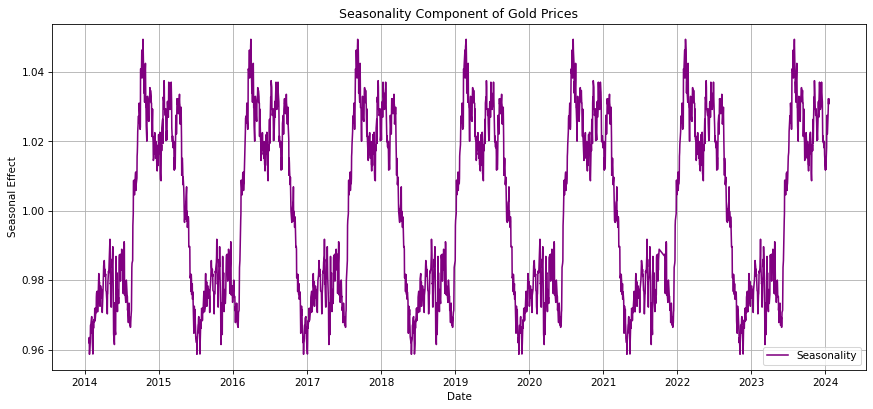

In [253]:
df_analysis = df.copy()
df_analysis.set_index('Date', inplace=True)
df_analysis = df_analysis.sort_index()

result = seasonal_decompose(df_analysis['Close'], model='multiplicative', period=365)

seasonal = result.seasonal
plt.figure(figsize=(14, 6))
plt.plot(seasonal, label='Seasonality', color='purple')
plt.title('Seasonality Component of Gold Prices')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend(loc='best')
plt.grid(True)
plt.show()

📍 The graph shows clear periodic patterns in the seasonality component of gold prices. This indicates that gold prices exhibit regular seasonal fluctuations. Each year, there are peaks and troughs that roughly correspond to the same periods, indicating a predictable seasonal pattern

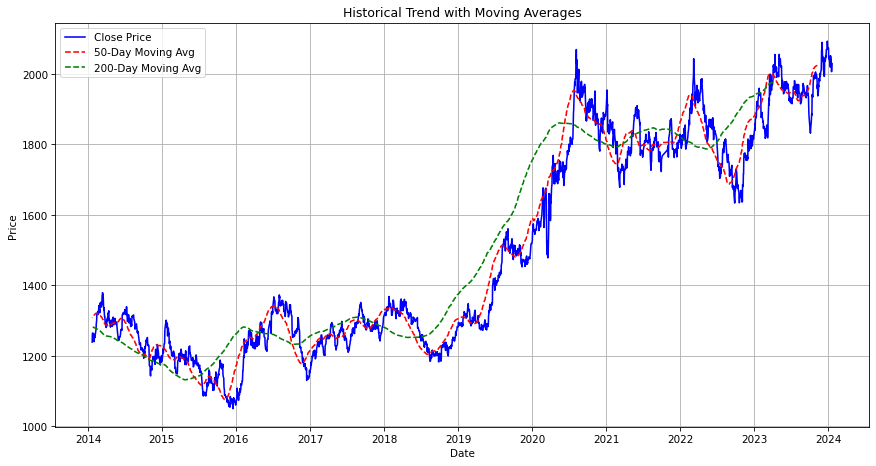

In [254]:
df_analysis2 = df.copy()
df_analysis2['MA_50'] = df_analysis2['Close'].rolling(window=50).mean()
df_analysis2['MA_200'] = df_analysis2['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_analysis2['Date'], df_analysis2['Close'], label='Close Price', color='blue')
plt.plot(df_analysis2['Date'], df_analysis2['MA_50'], label='50-Day Moving Avg', color='red', linestyle='--')
plt.plot(df_analysis2['Date'], df_analysis2['MA_200'], label='200-Day Moving Avg', color='green', linestyle='--')
plt.title('Historical Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

📍Analysis
* 50-Day Moving Average (red line): This short-term moving average shows more sensitivity to recent price changes and helps identify short-term trends
* 2015-2016: Gold prices are relatively stable with some minor fluctuations.
* 2017-2018: A slight upward trend with increased volatility. The moving averages show multiple crossovers, indicating short-term trend changes.
* 2019-2020: Significant upward trend in gold prices. Both moving averages trend upwards with the 50-day moving average staying above the 200-day moving average for an extended period, signaling strong bullish momentum.
* 2021-2022: Increased volatility with some corrections. The 50-day moving average crosses below the 200-day moving average briefly, indicating short-term bearish trends within the longer-term bullish context.
* 2023-2024: Stabilization and a slight upward trend. Both moving averages converge, indicating consolidation of gold prices.

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2493 non-null   datetime64[ns]
 1   Close   2493 non-null   float64       
 2   Volume  2493 non-null   float64       
 3   Open    2493 non-null   float64       
 4   High    2493 non-null   float64       
 5   Low     2493 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 136.3 KB


## Gold Price Forecasting

### ARIMA model

In [256]:
df_arima = df.copy()
df_arima.set_index('Date', inplace=True)
df_arima = df_arima.sort_index()
df_arima = df_arima.asfreq('B')

df_arima = df_arima.dropna()
result = adfuller(df_arima['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.639720
p-value: 0.861752


In [257]:
df_arima

,Close,Volume,Open,High,Low
Date,,,,,
2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5
2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
...,...,...,...,...,...
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6


📍 Since the p-value is greater than 0.05, this suggests that the time series is non-stationary And d = 1

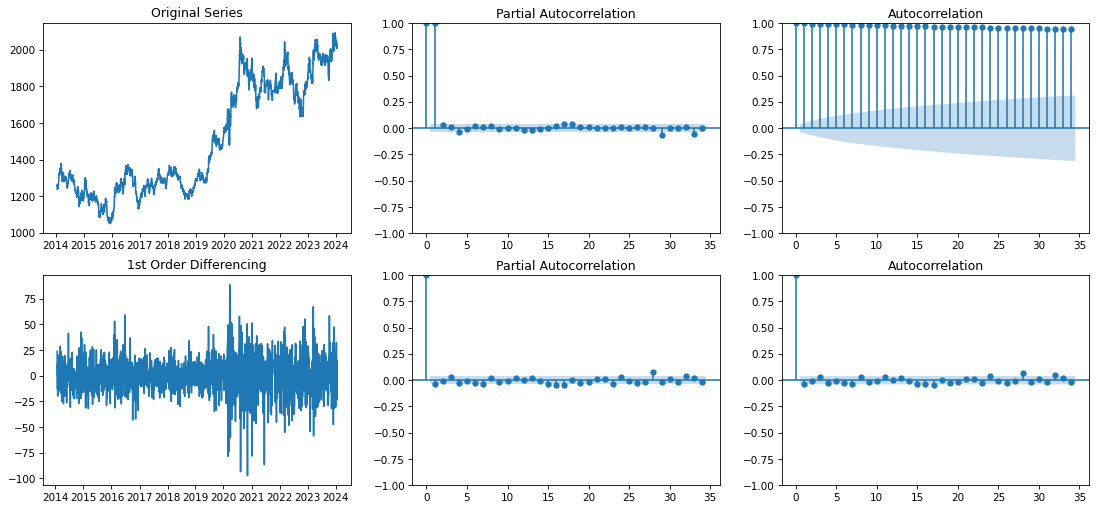

In [258]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(df_arima['Close']); axes[0, 0].set_title('Original Series')
plot_pacf(df_arima['Close'], ax=axes[0, 1])
plot_acf(df_arima['Close'], ax=axes[0, 2])

axes[1, 0].plot(df_arima['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df_arima['Close'].diff().dropna(), ax=axes[1, 1])
plot_acf(df_arima['Close'].diff().dropna(), ax=axes[1, 2])

plt.show()

📍 Based on PACF and ACF, define p = 1 and q = 1

In [259]:
test_size = int(len(df_arima) * 0.75)
train, test = df_arima.iloc[:test_size], df_arima.iloc[test_size:]

c:\Users\Nasya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Nasya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Nasya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1869
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -7549.167
Date:                Tue, 25 Jun 2024   AIC                          15102.334
Time:                        11:43:53   BIC                          15113.398
Sample:                             0   HQIC                         15106.410
                               - 1869                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9996      0.003   -314.053      0.000      -1.006      -0.993
sigma2       189.6777      3.101     61.167      0.000     183.600     195.755
Ljung-Box (L1) (Q):                   1.70   Jarque-

c:\Users\Nasya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Nasya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



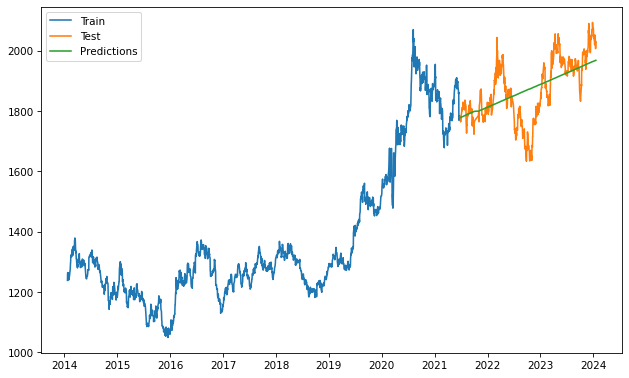

In [260]:
model = ARIMA(train['Close'], order=(0,2,1))
result = model.fit()

print(result.summary())

forecast = result.get_forecast(steps=len(test))
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

fc.index = test.index

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, fc, label='Predictions')
plt.legend()
plt.show()

### Random Forest Regression

In [261]:
df_reg = df.copy()
df_reg.index = df_reg.Date
df_reg.drop('Date', axis=1)

x = df_reg[['Volume', 'Open', 'High', 'Low']]
y = df_reg.Close

train_data = df_reg[df_reg.index < '2022-01-01']
test_data = df_reg[df_reg.index >= '2022-01-01']

x_train = train_data[['Volume', 'Open', 'High', 'Low']]
y_train = train_data['Close']
x_test = test_data[['Volume', 'Open', 'High', 'Low']]
y_test = test_data['Close']

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth': [3, 5, 9, 12, None], 
}

rf = RandomForestRegressor()
clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

clf.fit(x_train, y_train)

best_params = clf.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters found:  {'criterion': 'squared_error', 'max_depth': 9, 'n_estimators': 100}


In [273]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


model_regressor = RandomForestRegressor(n_estimators=100, max_depth=9)
model_regressor.fit(x_train, y_train)

prediction = model_regressor.predict(x_test)
error_score = metrics.r2_score(y_test, prediction)
print("R squared error : ", error_score)

R squared error :  0.9919293591886352


[2023.20633333 2015.26966667 2022.099      2044.215      2043.152
 2030.         2025.91633333 2035.56133333 2031.78233333 2046.752
 2048.687      2046.866      2054.84       2054.84       2054.84
 2054.84       2055.254      2054.84       2048.084      2051.36
 2040.778      2035.56133333 2044.508      2047.63       2016.34325
 2006.31960238 2013.37291667 2028.55633333 2040.778      2039.60733333
 2042.795      2048.204      2054.957      2053.592      2053.358
 2021.203      2010.36706667 2006.40260238 2006.31960238 2002.99845238
 1975.56908452 2000.88336667 2001.06925833 1966.81655706 1958.62149636
 1952.35282624 1951.32170318 1957.91638368 1964.09519873 1974.79764643
 2001.64323333 2006.31960238 2002.29473571 1991.7645119  2006.01731667
 2008.31335238 2006.52431667 2006.71860238 1979.7354619  1976.30508452
 2001.72823333 2005.34560238 1972.24618189 1957.13937899 1934.01244145
 1933.29415543 1925.9763763  1893.40316671 1883.19261282 1872.38878752
 1867.841673   1837.13429867 1836.96

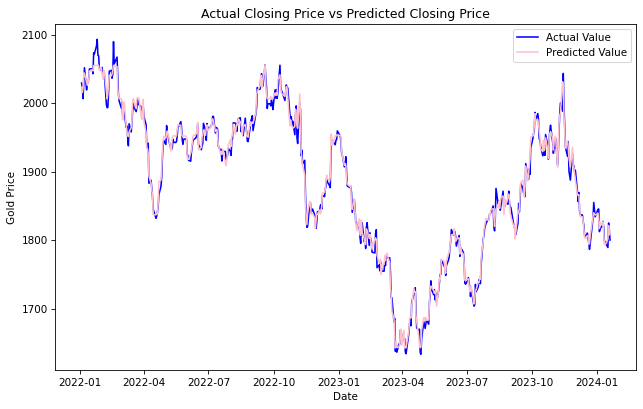

In [274]:
date_index = y_test.index
date_index = date_index.sort_values()
print(prediction)

plt.figure(figsize=(10, 6))
plt.plot(date_index, y_test, color='blue', label = 'Actual Value')
plt.plot(date_index, prediction, color='pink', label='Predicted Value')
plt.title('Actual Closing Price vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

## Backtesting Trading Strategies

### Backtesting Using Moving Average Crossover Strategy

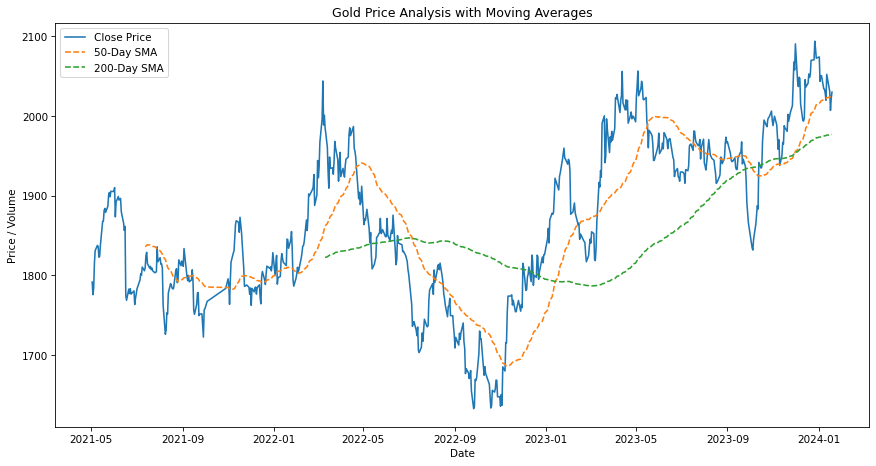

In [330]:
df_bt = df.copy()
df_bt.set_index('Date', inplace=True)
df_bt.sort_index(inplace=True)
df_bt = df_bt.loc['2021-05-01':'2024-01-31']

df_bt['SMA_50'] = df_bt['Close'].rolling(window=50).mean()
df_bt['SMA_200'] = df_bt['Close'].rolling(window=200).mean()
df_bt['Volume_SMA_20'] = df_bt['Volume'].rolling(window=20).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_bt.index, df_bt['Close'], label='Close Price')
plt.plot(df_bt.index, df_bt['SMA_50'], label='50-Day SMA', linestyle='--')
plt.plot(df_bt.index, df_bt['SMA_200'], label='200-Day SMA', linestyle='--')
plt.title('Gold Price Analysis with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price / Volume')
plt.legend()
plt.show()

In [332]:
def moving_average_crossover_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = np.where(data['SMA_50'] < data['SMA_200'], 1.0, 0.0)   
    signals['positions'] = signals['signal'].diff()
    signals['positions'].iloc[0] = signals['signal'].iloc[0]
    return signals

def backtest_strategy(data, signals, initial_capital=5000.0):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions['Close'] = signals['signal']
    portfolio = positions.multiply(data['Close'], axis=0)
    pos_diff = positions.diff()

    portfolio['holdings'] = (positions.multiply(data['Close'], axis=0)).sum(axis=1)
    portfolio['cash'] = initial_capital - (pos_diff.multiply(data['Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()

    final_capital = portfolio['total'].iloc[-1]
    total_return = (final_capital - initial_capital) / initial_capital * 100
    number_of_trades = signals['positions'].abs().sum() / 2  
    
    print(f"Number of trades: {number_of_trades}")
    print(f"Initial capital: ${initial_capital:,.2f}")
    print(f"Final capital: ${final_capital:,.2f}")
    print(f"Total return: {total_return:.2f}%")

    return portfolio

📍Buy Signal: The shorter-term moving average (SMA_50) crosses above the longer-term moving average (SMA_200) suggests that the recent price trends (represented by SMA_50) are becoming stronger compared to longer-term trends (represented by SMA_200), indicating a potential upward momentum in the price

📍Sell Signal: When the SMA_50 crosses below the SMA_200 suggests that recent price trends are weaker than longer-term trends, indicating a potential downward momentum in the price

C:\Users\Nasya\AppData\Local\Temp\ipykernel_8028\2971154713.py:5: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Number of trades: 2.0
Initial capital: $5,000.00
Final capital: $5,431.30
Total return: 8.63%
            Close  holdings    cash   total  returns
Date                                                
2021-05-03    0.0       0.0  5000.0  5000.0      NaN
2021-05-04    0.0       0.0  5000.0  5000.0      0.0
2021-05-05    0.0       0.0  5000.0  5000.0      0.0
2021-05-06    0.0       0.0  5000.0  5000.0      0.0
2021-05-07    0.0       0.0  5000.0  5000.0      0.0
...           ...       ...     ...     ...      ...
2024-01-12    0.0       0.0  5431.3  5431.3      0.0
2024-01-16    0.0       0.0  5431.3  5431.3      0.0
2024-01-17    0.0       0.0  5431.3  5431.3      0.0
2024-01-18    0.0       0.0  5431.3  5431.3      0.0
2024-01-19    0.0       0.0  5431.3  5431.3      0.0

[663 rows x 5 columns]


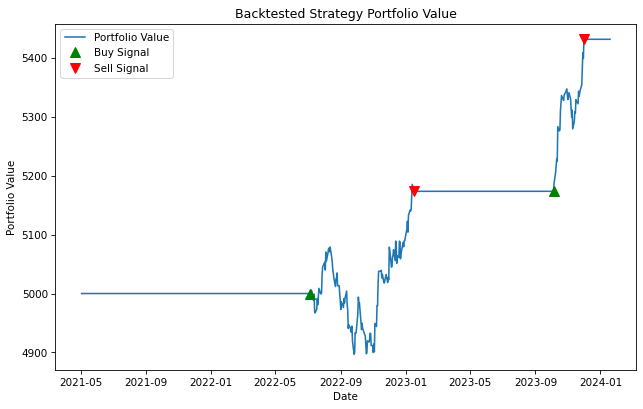

In [333]:
signals = moving_average_crossover_strategy(df_bt)
portfolio = backtest_strategy(df_bt, signals)

print(portfolio)
plt.figure(figsize=(10, 6))
plt.plot(portfolio['total'], label='Portfolio Value')
plt.plot(signals.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(signals.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Backtested Strategy Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

## Market Analysis

### Event 1 : Highest price of gold

Highest gold price: $2093.1 on 2023-12-27 00:00:00


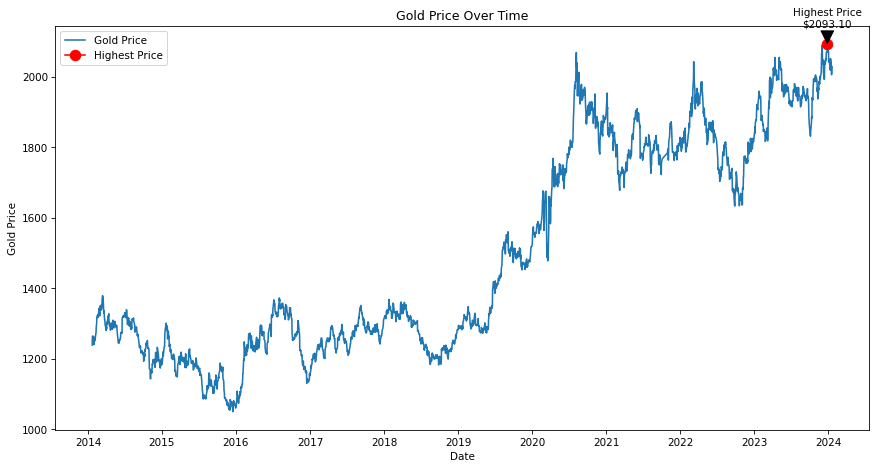

In [345]:
df.set_index('Date', inplace=True)
df = df.sort_index()

highest_price = df['Close'].max()
highest_price_date = df['Close'].idxmax()

print(f"Highest gold price: ${highest_price} on {highest_price_date}")

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Price')
plt.plot(highest_price_date, highest_price, marker='o', markersize=10, color='red', label='Highest Price')
plt.annotate(f'Highest Price\n${highest_price:.2f}', 
             xy=(highest_price_date, highest_price), 
             xytext=(highest_price_date, highest_price + 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

             Close    Volume    Open    High     Low  Year
Date                                                      
2014-03-14  1379.0  176638.0  1370.9  1388.4  1368.2  2014
2015-01-22  1300.7  198887.0  1293.7  1307.8  1279.1  2015
2016-08-02  1372.6  154681.0  1360.6  1374.2  1353.7  2016
2017-09-08  1351.2  377234.0  1354.0  1362.4  1347.1  2017
2018-01-25  1368.0  140915.0  1362.7  1370.5  1346.2  2018
2019-09-04  1560.4  404779.0  1556.0  1566.2  1542.6  2019
2020-08-06  2069.4  307517.0  2055.0  2081.8  2049.0  2020
2021-01-05  1954.4  192111.0  1946.0  1957.0  1938.4  2021
2022-03-08  2043.3  413624.0  2001.0  2078.8  1985.8  2022
2023-12-27  2093.1  124021.0  2079.3  2095.8  2072.8  2023
2024-01-02  2073.4  149926.0  2072.7  2088.1  2064.3  2024


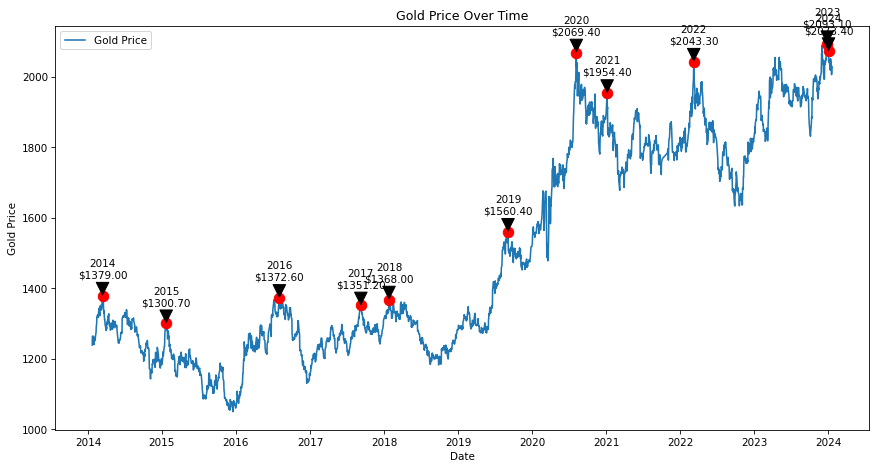

In [351]:
df['Year'] = df.index.year

highest_prices_each_year = df.groupby('Year')['Close'].max()
highest_prices_dates = df.loc[df.groupby('Year')['Close'].idxmax()]

print(highest_prices_dates)

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Price')

for date, row in highest_prices_dates.iterrows():
    plt.plot(date, row['Close'], marker='o', markersize=10, color='red')
    plt.annotate(f'{date.year}\n${row["Close"]:.2f}', 
                 xy=(date, row['Close']), 
                 xytext=(date, row['Close'] + 50),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='center')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

📍 Gold price tends to grow each year. But economic growth isn't always steady. There can be periods of recession or stagnation,  caused by factors like political instability, natural disasters, or financial crises. This economic situation also affect the price of gold
📍 Surprisingly, according to this dataset, the highest gold value each year is always at the beginning of the year, or the end of the year

### Event 2 : the most drastic increase in gold prices

Highest percentage increase: 5.98% on 2020-03-23 00:00:00


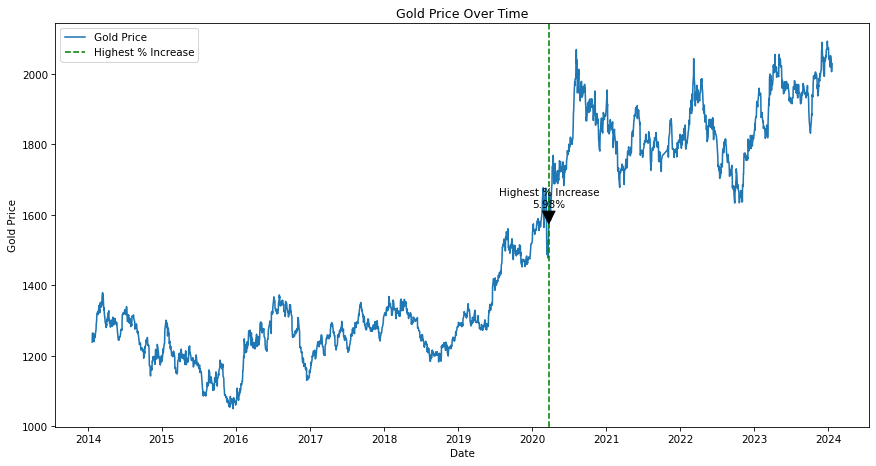

In [352]:
df['Pct Change'] = df['Close'].pct_change()

highest_pct_increase = df['Pct Change'].max()
highest_pct_increase_date = df['Pct Change'].idxmax()

print(f"Highest percentage increase: {highest_pct_increase:.2%} on {highest_pct_increase_date}")

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Price')

plt.axvline(x=highest_pct_increase_date, color='green', linestyle='--', label='Highest % Increase')

plt.annotate(f'Highest % Increase\n{highest_pct_increase:.2%}', 
             xy=(highest_pct_increase_date, df.loc[highest_pct_increase_date, 'Close']), 
             xytext=(highest_pct_increase_date, df.loc[highest_pct_increase_date, 'Close'] + 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

📍 Gold price was significantly increasing on March 23rd 2020 bt 5.98%
📍 According to my research, this time was the time when WHO declared COVID-19 a pandemic quoted from https://www.yalemedicine.org/news/covid-timeline by Kathy Katella on March 9th 2021
📍 the impact of pandemic is a positive correlation between the increasing number of global coronavirus cases and increases in gold price. (src : Ibrahim Yousef, Esam Shehadeh (2020). The Impact of COVID-19 on Gold Price Volatility, International Journal of Economics and Business Administration Volume VIII Issue 4, 353-364)

## Statistical Analysis

In [353]:
df.describe()

,Close,Volume,Open,High,Low,Year,Pct Change
count,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2492.000000
mean,1496.354272,186034.698355,1496.342479,1506.056839,1486.518091,2018.525872,0.000242
std,298.575898,97739.426777,298.860270,301.009257,296.172036,2.883059,0.009324
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,2014.000000,-0.049854
25%,1248.600000,126411.000000,1248.500000,1256.600000,1241.700000,2016.000000,-0.004395
50%,1331.400000,175222.000000,1332.000000,1340.900000,1324.500000,2019.000000,0.000208
75%,1803.800000,234908.000000,1803.800000,1813.900000,1791.800000,2021.000000,0.005051
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000,2024.000000,0.059771


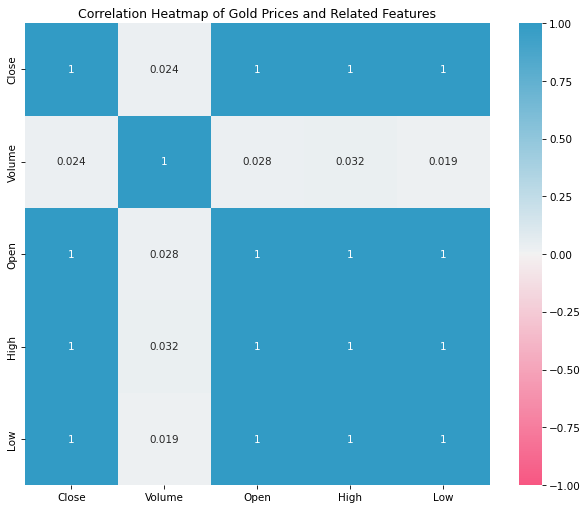

In [357]:
correlation_matrix = df[['Close', 'Volume', 'Open', 'High', 'Low']].corr()
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Gold Prices and Related Features')
plt.show()